<h1>Installing RDKit</h1>

In [1]:
import rdkit
import deepchem as dc
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn

In [2]:
dc.__version__

'2.5.0'

In [3]:
np.__version__

'1.19.5'

In [4]:
tf.__version__

'2.6.0'

In [195]:
df = pd.read_csv('https://raw.githubusercontent.com/saharctech/Binding-Free-Energy-Prediction-Host-Guest-System/master/Results/dataset.csv')

In [61]:
# Shuffle the data randomly
np.random.shuffle(df.values)

In [62]:
df.sample(frac = 1).reset_index(drop = True)

,ID,dataset group name,Dataset Name,Host,Guest,Ex _G_(kcal/mol),Ex _G_SEM,EX _H_(kcal/mol),EX _H_SEM,pb_guest_Etot,...,gb_host_1-4EEL,gb_host_EELEC,gb_host_EGB,gb_host_ESURF,gb_delta_H,pb_delta_H,EX _delta_H_(kcal/mol),gb_Ex_difference,SQR_gbnsr6_Ex_difference,pb_Ex_difference
0,6,Mobley benchmarkset,cd-set1,acd,guest-6,-1.506,0.036,-2.53,0.12,-56.4635,...,422.4095,-421.3737,-99.7968,5.1792,-5.8526,-7.6596,-2.53,-3.3226,11.039671,-5.1296
1,5,Mobley benchmarkset,cd-set1,acd,guest-5,-2.510,0.060,-2.99,0.23,-3.2280,...,425.7315,-435.9689,-91.2312,5.0881,-14.5517,-14.0485,-2.99,-11.5617,133.672907,-11.0585
2,57,SAMPL5,sample,OAH,guest-4,-9.370,0.000,-14.80,0.01,-71.3182,...,-84.1659,682.5314,-1393.0275,8.3952,-20.8245,-18.6504,-14.80,-6.0245,36.294600,-3.8504
3,4,Mobley benchmarkset,cd-set1,acd,guest-4,-2.130,0.016,-2.74,0.02,2.3898,...,420.0687,-416.5215,-97.4461,5.0849,-10.5586,-11.3319,-2.74,-7.8186,61.130506,-8.5919
4,3,Mobley benchmarkset,cd-set1,acd,guest-3,-4.606,0.007,-5.46,0.03,-51.5323,...,426.2925,-429.3068,-95.2452,5.1352,-15.4074,-13.8234,-5.46,-9.9474,98.950767,-8.3634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,SAMPL6,sample,CB8,guest-8,-13.500,NaN,-14.40,NaN,-8.2609,...,-2832.4453,1726.3218,-175.2083,6.2084,-23.9341,-19.8759,-14.40,-9.5341,90.899063,-5.4759
68,12,Mobley benchmarkset,cd-set1,acd,guest-12,-3.516,0.012,-4.20,0.08,-41.1288,...,412.4066,-400.9390,-105.0590,4.9828,-13.4909,-11.9374,-4.20,-9.2909,86.320823,-7.7374
69,48,Mobley benchmarkset,gdcc-set1,oa,guest-3,-5.400,0.003,-7.71,0.05,-75.3343,...,-82.8056,648.4615,-1362.9496,8.4766,-13.2718,-11.7104,-7.71,-5.5618,30.933619,-4.0004
70,39,Mobley benchmarkset,cd-set2,bcd,guest-17,-4.971,0.036,-3.92,0.06,-3.7638,...,495.8825,-501.0026,-111.8485,5.9620,-18.1821,-17.3926,-3.92,-14.2621,203.407496,-13.4726


<h1>Reading Mobley PDB files</h1>
<p>Here each PDB file will be read and saved in Mol data type defined in RDKit and used by DeepChem</p>

In [63]:
# Dictionary with complex names as keys and molecule as values
PDBs = {}
from os import listdir
from os.path import isfile, join
mypath = '/Users/misspotato/Documents/Github/Binding-Free-Energy-Prediction-Host-Guest-System/PDB'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for f in onlyfiles:
    PDBs.update({f.split('.')[0].replace('-s', '') : rdkit.Chem.rdmolfiles.MolFromPDBFile(mypath + '/' + f)})

In [64]:
PDBs.pop('',None)

<h1>Featurizing</h1>
<p>GraphConv model needs ConvMolFeaturizer</p>

In [65]:
featurizer = dc.feat.ConvMolFeaturizer(per_atom_fragmentation=False)

In [66]:
X = []
X_ids = []
one_add = 0 if len(PDBs.keys()) % 2 == 0 else 1
for k in PDBs.keys():
    X_ids.append(k)
    X.append(featurizer.featurize(PDBs[k]))

In [67]:
X = []
X_ids = []
one_add = 0 if len(PDBs.keys()) % 2 == 0 else 1
for k in PDBs.keys():
    X_ids.append(k)
    X.append(featurizer.featurize(PDBs[k]))
X = [x[0] for x in X]
X_train_featurized = X[:int(len(X) / 2)]
X_test_featurized = X[int(len(X) / 2) + one_add:]

In [68]:
host_names = [i.split('-')[0] for i in X_ids]
guest_names = ['guest-' + (i.split('-')[1].replace('s', '')) for i in X_ids]

In [69]:
host_names_train = host_names[:int(len(host_names) / 2)]
guest_names_train = guest_names[:int(len(guest_names) / 2)]
host_names_test = host_names[int(len(host_names) / 2) + one_add:]
guest_names_test = guest_names[int(len(guest_names) / 2) + one_add:]

In [70]:
x_add_train, x_add_test, y_train, y_test = [], [], [], []
for i in range(len(host_names_train)):
    new_df = df[(df['Host'] == host_names_train[i]) & (df['Guest'] == guest_names_train[i])]
    y_train.append(new_df['EX _H_(kcal/mol)'].to_numpy()[0])
    x_add_train.append(new_df[[c for c in df.columns if ('Etot' not in c) and ('delta' not in c)
                         and ('Ex_difference' not in c) and ('gb_' in c or 'VDWAALS' in c)]].to_numpy()[0])
y_train = np.array(y_train)
    
for i in range(len(host_names_test)):
    new_df = df[(df['Host'] == host_names_test[i]) & (df['Guest'] == guest_names_test[i])]
    y_test.append(new_df['EX _H_(kcal/mol)'].to_numpy()[0])
    x_add_test.append(new_df[[c for c in df.columns if ('Etot' not in c) and ('delta' not in c)
                         and ('Ex_difference' not in c) and ('gb_' in c or 'VDWAALS' in c)]].to_numpy()[0])
y_test = np.array(y_test)

In [72]:
from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

x_preprocessed_train, x_preprocessed_test = [], []

## for X train
multiConvMol = ConvMol.agglomerate_mols(X_train_featurized)
x_preprocessed_train = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
    x_preprocessed_train.append(multiConvMol.get_deg_adjacency_lists()[i])
x_preprocessed_train.append(np.array(x_add_train))

## for X test
multiConvMol = ConvMol.agglomerate_mols(X_test_featurized)
x_preprocessed_test = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
    x_preprocessed_test.append(multiConvMol.get_deg_adjacency_lists()[i])
x_preprocessed_test.append(np.array(x_add_test))

In [73]:
x_train = np.full([14, np.max([v.shape[0] for v in x_preprocessed_train]),
                  np.max([v.shape[1] for v in x_preprocessed_train if len(v.shape) > 1])], 1.123456)
for i,j in enumerate(x_preprocessed_train):
    if len(j.shape) > 1:
        x_train[i][:j.shape[0],:j.shape[1]] = np.array(j)
    else:
        x_train[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
x_train = x_train.reshape([1] + list(x_train.shape))

x_test = np.full([14, np.max([v.shape[0] for v in x_preprocessed_test]),
                  np.max([v.shape[1] for v in x_preprocessed_test if len(v.shape) > 1])], 1.123456)
for i,j in enumerate(x_preprocessed_test):
    if len(j.shape) > 1:
        x_test[i][:j.shape[0],:j.shape[1]] = np.array(j)
    else:
        x_test[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
x_test = x_test.reshape([1] + list(x_test.shape))

In [74]:
x_train.shape

(1, 14, 3401, 75)

In [75]:
x_test.shape

(1, 14, 3826, 75)

<h1>Physics Guided Neural Network Model</h1>

In [99]:
# X_features = []
# for x_feat in X:
#     multiConvMol = ConvMol.agglomerate_mols([x_feat])
#     new_x_feat = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
#     for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
#         new_x_feat.append(multiConvMol.get_deg_adjacency_lists()[i])
#     X_features.append(new_x_feat)

In [100]:
## !!!!!!!! important
## !!!!!!!! important
## !!!!!!!! important
## !!!!!!!! important
input_shapes = [i.shape for i in x_preprocessed_train]

In [101]:
input_shapes

[(3401, 75),
 (11, 2),
 (3401,),
 (733, 1),
 (1097, 2),
 (1567, 3),
 (4, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (36, 15)]

In [102]:
from deepchem.models.layers import GraphConv, GraphPool, GraphGather
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Concatenate
from tensorflow.keras import initializers

batch_size = int(len(df) / 2)

class GBGraphConvModel(tf.keras.Model):

  def __init__(self):
    super(GBGraphConvModel, self).__init__()
    self.gc1 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm1 = layers.BatchNormalization()
    self.gp1 = GraphPool()

    self.gc2 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm2 = layers.BatchNormalization()
    self.gp2 = GraphPool()

    self.dense1 = layers.Dense(128, activation=tf.nn.tanh)
    self.batch_norm3 = layers.BatchNormalization()
    self.readout = GraphGather(batch_size=batch_size, activation_fn=tf.nn.tanh)

    self.dense2 = layers.Dense(1)
    self.dense3 = layers.Dense(1, 
         kernel_initializer=initializers.Constant([.5, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1]),
         bias_initializer=initializers.Zeros())

  def call(self, inputs):
    inputs = inputs[0]
    x = []
#     input_shapes = [[4822, 75], [11, 2], [4822], [1142, 1], [1635, 2], [2042, 3],
#                    [3, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10]]
    for i in range(len(input_shapes)):
        x.append(tf.reshape(inputs[i][inputs[i] != 1.123456], input_shapes[i]))
    for i in range(1, len(input_shapes)):
        x[i] = tf.cast(x[i], tf.int32)
    x_add = tf.reshape(inputs[13][inputs[13] != 1.123456], [batch_size, 15])
    gc1_output = self.gc1(x)
    batch_norm1_output = self.batch_norm1(gc1_output)
    gp1_output = self.gp1([batch_norm1_output] + x[1:])

    gc2_output = self.gc2([gp1_output] + x[1:])
    batch_norm2_output = self.batch_norm1(gc2_output)
    gp2_output = self.gp2([batch_norm2_output] + x[1:])

    dense1_output = self.dense1(gp2_output)
    batch_norm3_output = self.batch_norm3(dense1_output)
    readout_output = self.readout([batch_norm3_output] + x[1:])

    model_var = self.dense2(readout_output)
    binding_affinity = tf.concat([model_var, x_add], axis=1)
    return self.dense3(binding_affinity)
model = GBGraphConvModel()
model.compile(loss='mse', optimizer='adam')

In [103]:
train_history = model.fit(x_train, y_train.reshape([1, -1]), epochs=600)

Epoch 1/600


/Users/misspotato/opt/miniconda3/envs/rdkit-deepchem-jupyter/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model_4/graph_pool_9/Reshape_14:0", shape=(733,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model_4/graph_pool_9/Reshape_13:0", shape=(733, 64), dtype=float32), dense_shape=Tensor("gradient_tape/gb_graph_conv_model_4/graph_pool_9/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/Users/misspotato/opt/miniconda3/envs/rdkit-deepchem-jupyter/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model_4/graph_pool_9/Reshape_17:0", shape=(2194,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model_4/graph_pool_9/Reshap

1/1 [==============================] - 4s 4s/step - loss: 90.2127
Epoch 2/600
1/1 [==============================] - 0s 47ms/step - loss: 60.8268
Epoch 3/600
1/1 [==============================] - 0s 48ms/step - loss: 58.0193
Epoch 4/600
1/1 [==============================] - 0s 48ms/step - loss: 51.1319
Epoch 5/600
1/1 [==============================] - 0s 46ms/step - loss: 44.2369
Epoch 6/600
1/1 [==============================] - 0s 48ms/step - loss: 41.5837
Epoch 7/600
1/1 [==============================] - 0s 46ms/step - loss: 41.9804
Epoch 8/600
1/1 [==============================] - 0s 44ms/step - loss: 41.2915
Epoch 9/600
1/1 [==============================] - 0s 42ms/step - loss: 37.9931
Epoch 10/600
1/1 [==============================] - 0s 41ms/step - loss: 34.3182
Epoch 11/600
1/1 [==============================] - 0s 47ms/step - loss: 32.0637
Epoch 12/600
1/1 [==============================] - 0s 46ms/step - loss: 31.7059
Epoch 13/600
1/1 [==============================] -

1/1 [==============================] - 0s 51ms/step - loss: 18.7803
Epoch 103/600
1/1 [==============================] - 0s 51ms/step - loss: 18.6929
Epoch 104/600
1/1 [==============================] - 0s 46ms/step - loss: 18.5830
Epoch 105/600
1/1 [==============================] - 0s 45ms/step - loss: 18.4959
Epoch 106/600
1/1 [==============================] - 0s 45ms/step - loss: 18.3781
Epoch 107/600
1/1 [==============================] - 0s 46ms/step - loss: 18.2224
Epoch 108/600
1/1 [==============================] - 0s 50ms/step - loss: 18.1259
Epoch 109/600
1/1 [==============================] - 0s 50ms/step - loss: 18.0012
Epoch 110/600
1/1 [==============================] - 0s 47ms/step - loss: 17.9349
Epoch 111/600
1/1 [==============================] - ETA: 0s - loss: 17.89 - 0s 49ms/step - loss: 17.8930
Epoch 112/600
1/1 [==============================] - 0s 49ms/step - loss: 17.7929
Epoch 113/600
1/1 [==============================] - 0s 48ms/step - loss: 17.6202
Epoch 

1/1 [==============================] - 0s 46ms/step - loss: 11.0023
Epoch 202/600
1/1 [==============================] - 0s 48ms/step - loss: 10.9522
Epoch 203/600
1/1 [==============================] - 0s 47ms/step - loss: 10.8963
Epoch 204/600
1/1 [==============================] - 0s 48ms/step - loss: 10.8416
Epoch 205/600
1/1 [==============================] - 0s 46ms/step - loss: 10.7844
Epoch 206/600
1/1 [==============================] - 0s 47ms/step - loss: 10.7313
Epoch 207/600
1/1 [==============================] - 0s 45ms/step - loss: 10.6731
Epoch 208/600
1/1 [==============================] - 0s 45ms/step - loss: 10.6154
Epoch 209/600
1/1 [==============================] - 0s 45ms/step - loss: 10.5694
Epoch 210/600
1/1 [==============================] - 0s 47ms/step - loss: 10.5138
Epoch 211/600
1/1 [==============================] - 0s 47ms/step - loss: 10.4644
Epoch 212/600
1/1 [==============================] - 0s 48ms/step - loss: 10.4190
Epoch 213/600
1/1 [===========

1/1 [==============================] - 0s 46ms/step - loss: 7.3366
Epoch 303/600
1/1 [==============================] - 0s 46ms/step - loss: 7.3754
Epoch 304/600
1/1 [==============================] - 0s 47ms/step - loss: 7.3030
Epoch 305/600
1/1 [==============================] - 0s 47ms/step - loss: 7.2839
Epoch 306/600
1/1 [==============================] - 0s 50ms/step - loss: 7.2556
Epoch 307/600
1/1 [==============================] - 0s 51ms/step - loss: 7.2440
Epoch 308/600
1/1 [==============================] - 0s 47ms/step - loss: 7.2222
Epoch 309/600
1/1 [==============================] - 0s 49ms/step - loss: 7.1877
Epoch 310/600
1/1 [==============================] - 0s 48ms/step - loss: 7.1821
Epoch 311/600
1/1 [==============================] - 0s 48ms/step - loss: 7.1885
Epoch 312/600
1/1 [==============================] - 0s 46ms/step - loss: 7.1608
Epoch 313/600
1/1 [==============================] - 0s 46ms/step - loss: 7.1541
Epoch 314/600
1/1 [=======================

1/1 [==============================] - 0s 47ms/step - loss: 6.6957
Epoch 404/600
1/1 [==============================] - 0s 49ms/step - loss: 6.6949
Epoch 405/600
1/1 [==============================] - 0s 45ms/step - loss: 6.6940
Epoch 406/600
1/1 [==============================] - 0s 43ms/step - loss: 6.6933
Epoch 407/600
1/1 [==============================] - 0s 46ms/step - loss: 6.6924
Epoch 408/600
1/1 [==============================] - 0s 52ms/step - loss: 6.6917
Epoch 409/600
1/1 [==============================] - 0s 51ms/step - loss: 6.6910
Epoch 410/600
1/1 [==============================] - 0s 50ms/step - loss: 6.6902
Epoch 411/600
1/1 [==============================] - 0s 53ms/step - loss: 6.6896
Epoch 412/600
1/1 [==============================] - 0s 53ms/step - loss: 6.6889
Epoch 413/600
1/1 [==============================] - 0s 51ms/step - loss: 6.6882
Epoch 414/600
1/1 [==============================] - 0s 52ms/step - loss: 6.6876
Epoch 415/600
1/1 [=======================

1/1 [==============================] - 0s 45ms/step - loss: 6.6655
Epoch 505/600
1/1 [==============================] - 0s 43ms/step - loss: 6.6654
Epoch 506/600
1/1 [==============================] - 0s 43ms/step - loss: 6.6653
Epoch 507/600
1/1 [==============================] - 0s 42ms/step - loss: 6.6653
Epoch 508/600
1/1 [==============================] - 0s 50ms/step - loss: 6.6652
Epoch 509/600
1/1 [==============================] - 0s 51ms/step - loss: 6.6651
Epoch 510/600
1/1 [==============================] - 0s 48ms/step - loss: 6.6651
Epoch 511/600
1/1 [==============================] - 0s 47ms/step - loss: 6.6650
Epoch 512/600
1/1 [==============================] - 0s 46ms/step - loss: 6.6649
Epoch 513/600
1/1 [==============================] - 0s 45ms/step - loss: 6.6648
Epoch 514/600
1/1 [==============================] - 0s 48ms/step - loss: 6.6648
Epoch 515/600
1/1 [==============================] - 0s 46ms/step - loss: 6.6647
Epoch 516/600
1/1 [=======================

In [104]:
input_shapes = [i.shape for i in x_preprocessed_test]

In [105]:
input_shapes

[(3826, 75),
 (11, 2),
 (3826,),
 (781, 1),
 (1373, 2),
 (1665, 3),
 (7, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (36, 15)]

In [106]:
test_history = model.evaluate(x_test, y_test.reshape([1, -1]))

1/1 [==============================] - 1s 776ms/step - loss: 46.5440


In [169]:
pgnn_rmse_test = np.sqrt(46.5440)
print(pgnn_rmse_test)

6.822316322188527


<h1> Physics based model RMSE </h1>

In [109]:
import math
train_sum=0
for i in range(len(host_names_train)):
    new_df = df[(df['Host'] == host_names_train[i]) & (df['Guest'] == guest_names_train[i])]
    train_sum += new_df['gb_Ex_difference'].to_numpy()[0] **2


test_sum = 0
for i in range(len(host_names_test)):
    new_df = df[(df['Host'] == host_names_test[i]) & (df['Guest'] == guest_names_test[i])]
    test_sum += new_df['gb_Ex_difference'].to_numpy()[0] **2
    

In [110]:
physics_based_rmse_train = math.sqrt(train_sum / len(host_names_train))

In [111]:
physics_based_rmse_test = math.sqrt((test_sum) / len(host_names_test))

In [112]:
print(f"RMSE on training set is : {physics_based_rmse_train}")
print(f"RMSE on testing set is : {physics_based_rmse_test}")
# Total rmse
total_rmse_physics = np.sqrt(np.mean((df['EX _H_(kcal/mol)'].to_numpy() - df['gb_delta_H'].to_numpy())**2))
print(f"RMSE of the total data: {total_rmse_physics}")

RMSE on training set is : 9.228558026943679
rmse on testing set is : 9.003128416062442
RMSE of the total data: 9.116540038105947


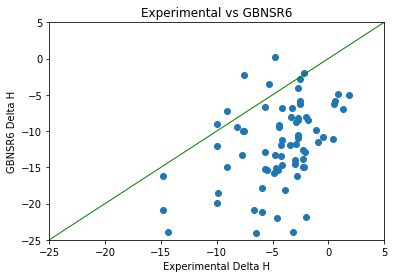

In [127]:
import matplotlib.pyplot as plt

plt.title("Experimental vs GBNSR6")
plt.scatter(x=df['EX _H_(kcal/mol)'], y=df['gb_delta_H'])
plt.xlabel("Experimental Delta H")
plt.ylabel("GBNSR6 Delta H")
plt.xlim(-25, 5)
plt.ylim(-25,5)

#reference line
plt.plot([-25, 5], [-25, 5], color='green', lw=1)

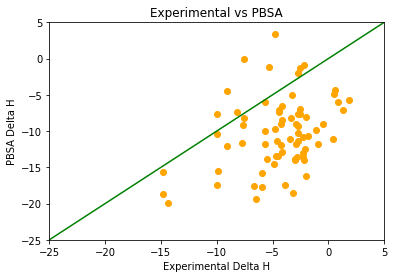

In [156]:
plt.title("Experimental vs PBSA")
plt.scatter(x=df['EX _H_(kcal/mol)'] ,y=df['pb_delta_H'], color='orange')
plt.xlabel("Experimental Delta H")
plt.ylabel("PBSA Delta H")
plt.xlim(-25, 5)
plt.ylim(-25,5)
#reference line
plt.plot([-25,5],[-25,5], color='green')

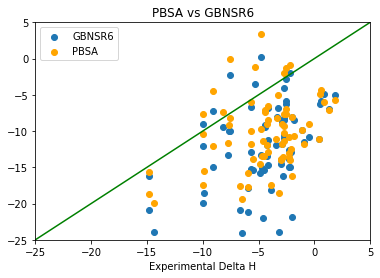

In [167]:
ax = plt.subplot()
plt.title("PBSA vs GBNSR6")
plt.xlabel('Experimental Delta H')
# plt.ylabel('gb-pb')
ax.scatter(x=df["EX _H_(kcal/mol)"], y=df['gb_delta_H'], label="GBNSR6")
ax.scatter(x=df["EX _H_(kcal/mol)"], y=df['pb_delta_H'], label="PBSA", color="orange")
plt.xlim(-25,5)
plt.ylim(-25,5)
#reference line
plt.plot([-25,5],[-25,5],color='green')
plt.legend()

In [146]:
gb_correlation_matrix = np.corrcoef(df['gb_delta_H'], df['EX _H_(kcal/mol)'])
gb_correlation_gbex = gb_correlation_matrix[0,1]
gb_r_squared = gb_correlation_gbex**2
print(gb_r_squared)

0.16443424102892068


In [154]:
pb_correlation_matrix = np.corrcoef(df['pb_delta_H'], df['EX _H_(kcal/mol)'])
pb_correlation_pbex = pb_correlation_matrix[0,1]
pb_r_squared = pb_correlation_pbex**2
print(pb_r_squared)

0.10981444457787434


<h1> Data Driven Model </h1>

In [196]:
## !!!!!!!! important
## !!!!!!!! important
## !!!!!!!! important
## !!!!!!!! important
input_shapes = [i.shape for i in x_preprocessed_train]

In [201]:
batch_size = int(len(df) / 2)

class GBGraphConvModel(tf.keras.Model):

  def __init__(self):
    super(GBGraphConvModel, self).__init__()
    self.input_shapes = input_shapes
    self.gc1 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm1 = layers.BatchNormalization()
    self.gp1 = GraphPool()

    self.gc2 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm2 = layers.BatchNormalization()
    self.gp2 = GraphPool()

    self.dense1 = layers.Dense(128, activation=tf.nn.tanh)
    self.batch_norm3 = layers.BatchNormalization()
    self.readout = GraphGather(batch_size=batch_size, activation_fn=tf.nn.tanh)

    self.dense2 = layers.Dense(1)
#     self.dense3 = layers.Dense(1, 
#          kernel_initializer=initializers.Constant([.5, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1]),
#          bias_initializer=initializers.Zeros())

  def call(self, inputs):
    inputs = inputs[0]
    x = []
#     input_shapes = [[4822, 75], [11, 2], [4822], [1142, 1], [1635, 2], [2042, 3],
#                    [3, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10]]
    for i in range(len(self.input_shapes)):
        x.append(tf.reshape(inputs[i][inputs[i] != 1.123456], self.input_shapes[i]))
    for i in range(1, len(self.input_shapes)):
        x[i] = tf.cast(x[i], tf.int32)
    x_add = tf.reshape(inputs[13][inputs[13] != 1.123456], [batch_size, 15])
    gc1_output = self.gc1(x)
    batch_norm1_output = self.batch_norm1(gc1_output)
    gp1_output = self.gp1([batch_norm1_output] + x[1:])

    gc2_output = self.gc2([gp1_output] + x[1:])
    batch_norm2_output = self.batch_norm1(gc2_output)
    gp2_output = self.gp2([batch_norm2_output] + x[1:])

    dense1_output = self.dense1(gp2_output)
    batch_norm3_output = self.batch_norm3(dense1_output)
    readout_output = self.readout([batch_norm3_output] + x[1:])

    model_var = self.dense2(readout_output)
#     binding_affinity = tf.concat([model_var, x_add], axis=1)
    return model_var #self.dense3(binding_affinity)
model = GBGraphConvModel()
model.compile(loss='mse', optimizer='adam')

In [202]:
history_dd_train = model.fit(x_train, y_train.reshape([1, -1]), epochs=370)

Epoch 1/370


/Users/misspotato/opt/miniconda3/envs/rdkit-deepchem-jupyter/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model_7/graph_pool_15/Reshape_14:0", shape=(733,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model_7/graph_pool_15/Reshape_13:0", shape=(733, 64), dtype=float32), dense_shape=Tensor("gradient_tape/gb_graph_conv_model_7/graph_pool_15/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/Users/misspotato/opt/miniconda3/envs/rdkit-deepchem-jupyter/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model_7/graph_pool_15/Reshape_17:0", shape=(2194,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model_7/graph_pool_15/R

1/1 [==============================] - 5s 5s/step - loss: 15.5587
Epoch 2/370
1/1 [==============================] - 0s 51ms/step - loss: 9.5534
Epoch 3/370
1/1 [==============================] - 0s 50ms/step - loss: 8.0738
Epoch 4/370
1/1 [==============================] - 0s 50ms/step - loss: 7.4710
Epoch 5/370
1/1 [==============================] - 0s 51ms/step - loss: 6.9383
Epoch 6/370
1/1 [==============================] - 0s 53ms/step - loss: 6.8978
Epoch 7/370
1/1 [==============================] - 0s 52ms/step - loss: 6.8817
Epoch 8/370
1/1 [==============================] - 0s 52ms/step - loss: 6.7752
Epoch 9/370
1/1 [==============================] - 0s 48ms/step - loss: 6.7147
Epoch 10/370
1/1 [==============================] - 0s 52ms/step - loss: 6.7138
Epoch 11/370
1/1 [==============================] - 0s 52ms/step - loss: 6.7043
Epoch 12/370
1/1 [==============================] - 0s 54ms/step - loss: 6.7014
Epoch 13/370
1/1 [==============================] - 0s 60ms/st

1/1 [==============================] - 0s 56ms/step - loss: 6.6619
Epoch 104/370
1/1 [==============================] - 0s 51ms/step - loss: 6.6619
Epoch 105/370
1/1 [==============================] - 0s 53ms/step - loss: 6.6619
Epoch 106/370
1/1 [==============================] - 0s 51ms/step - loss: 6.6619
Epoch 107/370
1/1 [==============================] - 0s 56ms/step - loss: 6.6619
Epoch 108/370
1/1 [==============================] - 0s 53ms/step - loss: 6.6619
Epoch 109/370
1/1 [==============================] - 0s 53ms/step - loss: 6.6619
Epoch 110/370
1/1 [==============================] - 0s 53ms/step - loss: 6.6619
Epoch 111/370
1/1 [==============================] - 0s 53ms/step - loss: 6.6619
Epoch 112/370
1/1 [==============================] - 0s 52ms/step - loss: 6.6619
Epoch 113/370
1/1 [==============================] - 0s 51ms/step - loss: 6.6619
Epoch 114/370
1/1 [==============================] - 0s 53ms/step - loss: 6.6619
Epoch 115/370
1/1 [=======================

1/1 [==============================] - 0s 46ms/step - loss: 6.6618
Epoch 205/370
1/1 [==============================] - 0s 48ms/step - loss: 6.6618
Epoch 206/370
1/1 [==============================] - 0s 49ms/step - loss: 6.6618
Epoch 207/370
1/1 [==============================] - 0s 53ms/step - loss: 6.6618
Epoch 208/370
1/1 [==============================] - 0s 52ms/step - loss: 6.6618
Epoch 209/370
1/1 [==============================] - 0s 50ms/step - loss: 6.6618
Epoch 210/370
1/1 [==============================] - 0s 51ms/step - loss: 6.6618
Epoch 211/370
1/1 [==============================] - 0s 50ms/step - loss: 6.6618
Epoch 212/370
1/1 [==============================] - 0s 48ms/step - loss: 6.6618
Epoch 213/370
1/1 [==============================] - 0s 50ms/step - loss: 6.6618
Epoch 214/370
1/1 [==============================] - 0s 47ms/step - loss: 6.6618
Epoch 215/370
1/1 [==============================] - 0s 47ms/step - loss: 6.6618
Epoch 216/370
1/1 [=======================

1/1 [==============================] - 0s 49ms/step - loss: 6.6620
Epoch 306/370
1/1 [==============================] - 0s 50ms/step - loss: 6.6620
Epoch 307/370
1/1 [==============================] - 0s 50ms/step - loss: 6.6620
Epoch 308/370
1/1 [==============================] - 0s 49ms/step - loss: 6.6620
Epoch 309/370
1/1 [==============================] - 0s 49ms/step - loss: 6.6619
Epoch 310/370
1/1 [==============================] - 0s 49ms/step - loss: 6.6619
Epoch 311/370
1/1 [==============================] - 0s 51ms/step - loss: 6.6619
Epoch 312/370
1/1 [==============================] - 0s 50ms/step - loss: 6.6619
Epoch 313/370
1/1 [==============================] - 0s 49ms/step - loss: 6.6619
Epoch 314/370
1/1 [==============================] - 0s 47ms/step - loss: 6.6619
Epoch 315/370
1/1 [==============================] - 0s 48ms/step - loss: 6.6619
Epoch 316/370
1/1 [==============================] - 0s 46ms/step - loss: 6.6619
Epoch 317/370
1/1 [=======================

In [203]:
model.input_shapes = [i.shape for i in x_preprocessed_test]

In [204]:
model.evaluate(x_test, y_test.reshape([1, -1]))

1/1 [==============================] - 1s 815ms/step - loss: 23.2741


23.274051666259766

In [207]:
dd_rmse_test = np.sqrt(23.2741)
print(dd_rmse_test)

4.824323786811992


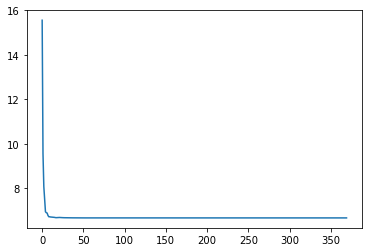

In [206]:
import matplotlib.pyplot as plt
plt.plot(history_dd_train.history['loss'])

<h1> Model Comparisons </h1>

In [208]:
from prettytable import PrettyTable
rmse_table = PrettyTable()
rmse_table.title="Test Set RMSE"
rmse_table.field_names = ["GBNSR6", "Data Driven", "PGNN"]
rmse_table.add_row(["{:.2f}".format(physics_based_rmse_test), "{:.2f}".format(dd_rmse_test),"{:.2f}".format(pgnn_rmse_test)])
print(rmse_table)

+-----------------------------+
|        Test Set RMSE        |
+--------+-------------+------+
| GBNSR6 | Data Driven | PGNN |
+--------+-------------+------+
|  9.00  |     4.82    | 6.82 |
+--------+-------------+------+


<h1> Loss per epoch </h1>

In [113]:
print(model.summary())

Model: "gb_graph_conv_model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
graph_conv_8 (GraphConv)     multiple                  102144    
_________________________________________________________________
batch_normalization_12 (Batc multiple                  256       
_________________________________________________________________
graph_pool_8 (GraphPool)     multiple                  0         
_________________________________________________________________
graph_conv_9 (GraphConv)     multiple                  87360     
_________________________________________________________________
batch_normalization_13 (Batc multiple                  0 (unused)
_________________________________________________________________
graph_pool_9 (GraphPool)     multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple        

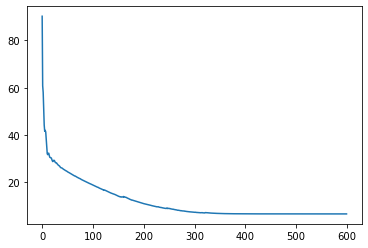

In [114]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'])